In [1]:
%matplotlib inline

ImportError: DLL load failed: %1 is not a valid Win32 application.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.svm import NuSVC

ImportError: DLL load failed: %1 is not a valid Win32 application.

In [3]:
data1 = loadmat('./data/ex6/ex6data1.mat')

In [4]:
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [5]:
X = data1['X']
y = data1['y']

Changing the data type of y to int64 originally it was uint8 and thus was not able to set y value as -1 (taking that as 255)

In [6]:
y = y.astype('int64')

## Plot Train Data

In [7]:
def plot_2d_data(X, y):
    positive_indices = np.where(y==1)[0]  #since y is a 2D matrix result is a tuple with two values
#     print(positive_indices)
    negative_indices = np.where(y==0)[0]
    plt.figure()
    a = plt.plot(X[positive_indices,0],X[positive_indices,1], 'k+')
    b = plt.plot(X[negative_indices,0], X[negative_indices,1], 'yo')
    plt.legend((a[0], b[0]), ('Positive', 'Negative') )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

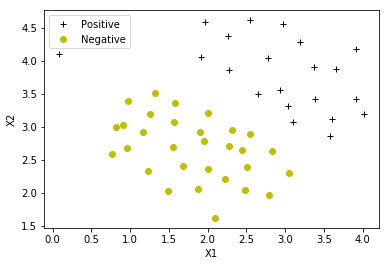

In [8]:
plot_2d_data(X,y)

##  Model Fitting

In [9]:
clf = SVC(kernel='linear', C=100, tol=0.001)
clf.fit(X,y.flatten())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Checking accuracy on train data

In [10]:
np.mean(np.double(y.flatten()==clf.predict(X)))*100 # 100% trainig accuracy

100.0

## Visualizing Decision Boundary

$\theta_0$ in clf is intercept_ term <br>
coef_ gives the learned value of weights/theta for features

In [11]:
# plot_x = np.array([[X[0,0], X[-1,0]]])
# plot_y = X2
# # plt.plot(plot_x, plot_y, '--')
def plotDecisionBoundary(X, y, clf):

    positive_indices = np.where(y==1)[0]  #since y is a 2D matrix result is a tuple with two values
    #     print(positive_indices)
    negative_indices = np.where(y==0)[0]
    plt.figure()
    a = plt.plot(X[positive_indices,0],X[positive_indices,1], 'k+')
    b = plt.plot(X[negative_indices,0], X[negative_indices,1], 'yo')
    plt.xlabel('X1')
    plt.ylabel('X2')
    theta = clf.coef_
    theta0 = clf.intercept_
    X2 = np.zeros((1,2))
    X2[0][0] = ((-theta0) - theta[0][0]*X[0,0])/theta[0][1]  #creating the equation of line to plot the data
    X2[0][1] = ((-theta0) - theta[0][0]*X[-1,0])/theta[0][1]
    plot_x = [X[0,0], X[-1,0], 4] # taking third point as X1=4, X2= ((-theta0) - theta[0][0]*X[-1,0])/theta[0][1]
    plot_y  = [X2[0][0], X2[0][1], ((-theta0) - theta[0][0]*4)/theta[0][1]]
    c = plt.plot(plot_x, plot_y)
    plt.legend((a[0], b[0], c[0]), ('Positive', 'Negative', 'Decision Boundary') )
    plt.show()

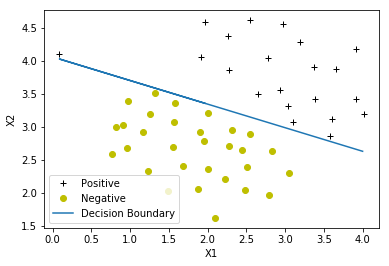

In [12]:
plotDecisionBoundary(X, y, clf)

In [13]:
clf.support_vectors_

array([[1.3191  , 3.5109  ],
       [3.5772  , 2.856   ],
       [0.086405, 4.1045  ]])

In [14]:
clf.support_

array([42,  4, 50])

## Gaussian Kernel

Using another data for gaussian kernel

In [15]:
data2 = loadmat('./data/ex6/ex6data2.mat')

In [16]:
X_2 = data2['X']
y_2 = data2['y']

In [28]:
y_2 = y_2.astype('int64')

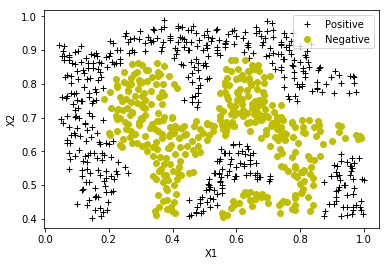

In [29]:
plot_2d_data(X_2, y_2)

Gaussian Kernel uses a gaussian similarity function which determines the similarity between two points

$$K_{gaussian}(x^{(i)}, x^{(j)})=exp\biggl({-\frac{||x^{(i)}-x^{(j)}||^{2}}{2\sigma^{2}}}\biggr)$$

$$K_{gaussian}(x^{(i)}, x^{(j)})=exp\biggl({-\frac{\sum_{k=1}^{n}(x_{k}^{(i)}-x_{k}^{(j)})^{2}}{2\sigma^{2}}}\biggr)$$

Writing Equations in Markdown <a href= https://tex.stackexchange.com/questions/78736/bigger-parentheses-in-equations > 
    Check here</a>
    <a href = https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html>
    And here </a>:
<ol>
<li>_ :- subscript </li>
<li>\frac = fraction</li>
<li>\sigma = sigma symbol</li>
<li>\lambda = lambda symbol</li>
</ol>

In [30]:
def gaussianKernel(x1, x2, sigma):
    K = np.exp(-(np.sum(np.power(x1-x2,2)))/(2*(sigma**2))) # similarity measure
    return K

In [31]:
x1 = np.array([[1],[2],[1]])
x2 = np.array([[0],[4],[-1]])
sigma = 2
K = gaussianKernel(x1,x2,sigma)

In [32]:
K

0.32465246735834974

**We set the tolerance and max_passes low here so that the code will run**

In [160]:
sigma = 0.1
gamma = 1/(2*(sigma**2))
gamma

49.99999999999999

In [164]:
clf_gaussian = SVC(kernel='rbf', degree=3, C=1, gamma=gamma)
clf_gaussian.fit(X_2, y_2.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [165]:
clf_gaussian.kernel

'rbf'

In [166]:
np.mean(np.double(y_2.flatten() == clf_gaussian.predict(X_2)))*100

98.95712630359212

In [167]:
def plotGaussianBoundary(X,y, clf):
    plt.figure()
    x1plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100).reshape((-1,1))
    x2plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]),100).reshape((-1,1))
    X1, X2 = np.meshgrid(x1plot, x2plot)
#     print("X1 shape", X1.shape)
#     print("X2 shape", X2.shape)
    vals =  np.zeros(X1.shape)
    for i in range(x1plot.shape[0]):
#         print("X1 shape", X1[:,i].reshape((-1,1)).shape)
        this_X = np.array([X1[:,i], X2[:,i]]).T
#         print("This_X shape", this_X.shape)
        vals[:,i] = clf.predict(this_X)
    plt.contour(X1, X2, vals)
    positive_indices = np.where(y==1)[0]  #since y is a 2D matrix result is a tuple with two values
    negative_indices = np.where(y==0)[0]
    a = plt.plot(X[positive_indices,0],X[positive_indices,1], 'k+')
    b = plt.plot(X[negative_indices,0], X[negative_indices,1], 'o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend((a[0], b[0]), ('Positive', 'Negative'))

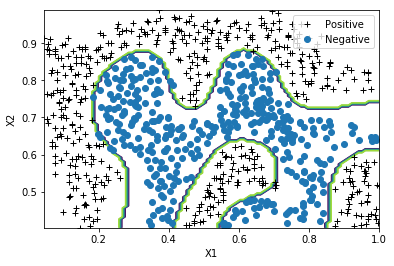

In [168]:
plotGaussianBoundary(X_2, y_2, clf_gaussian)

In [26]:
data3 = loadmat('./data/ex6/ex6data3.mat')

In [27]:
data3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [43]:
X_3 = data3['X']
y_3 = data3['y']
X_3_val = data3['Xval']
y_3_val = data3['yval']

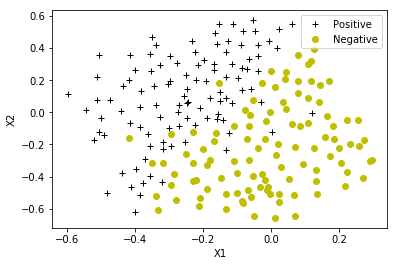

In [44]:
plot_2d_data(X_3, y_3)

**gamma is equivalent to** $\frac{1}{2*{\sigma^{2}}}$

Here we are using cross-validation set to try different value of C and gamma(sigma) and find out the best parameters by calculating accuracies

In [133]:
clf_3 = SVC(kernel='rbf', C=1, gamma=60)
clf_3.fit(X_3, y_3.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=60, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
np.mean(np.double(y_3.flatten() == clf_3.predict(X_3)))*100

94.3127962085308

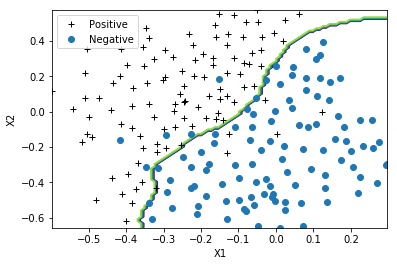

In [135]:
plotGaussianBoundary(X_3, y_3, clf_3)

Defining a function lig=ke grid search CV to find out the best parameters

In [176]:
def dataset3Params(X, y, X_val, y_val):
    values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    accuracy_old = 0
    sigma_best = 0
    c_best = 0
    for c in values:
        for sigma in values:
            gamma = 1/(2*(sigma**2))
            clf = SVC(kernel='rbf', gamma = gamma, C=c)
            clf.fit(X,y.flatten())
            accuracy_new = np.mean(np.double(y_val.flatten() == clf.predict(X_val)))
            print("Accuracy New", accuracy_new)
            if accuracy_new > accuracy_old:
                accuracy_old = accuracy_new
                sigma_best = sigma
                c_best = c
    return (sigma_best,c_best)
    

In [172]:
sigma ,  C = dataset3Params(X_3, y_3, X_3_val, y_3_val)

In [173]:
sigma

0.1

In [175]:
C

1

In [178]:
gamma = 1/(2*(sigma**2))
gamma

49.99999999999999

In [179]:
clf_3 = SVC(kernel='rbf', C=C, gamma=gamma)


In [180]:
clf_3.fit(X_3, y_3.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

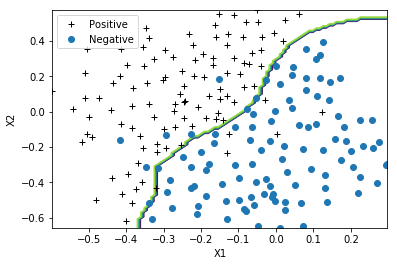

In [181]:
plotGaussianBoundary(X_3, y_3, clf_3)

As per the exercise